# Chapter 7

In [1]:
# load modules
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from patsy import dmatrix

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.da

## Question 6

In [2]:
# load data
wage = pd.read_csv('./datasets/wage.csv')
wage.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
# Model variables
y = wage['wage'][:,np.newaxis]
X = wage['age'][:,np.newaxis]

In [4]:
# 6a)
# polynomial regression, to predict wage using age.
scores = []
for deg in range(1,15):
    pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=deg)),
                ('lin_reg', LinearRegression())])
    pipe.fit(X,y)
    score = cross_val_score(pipe, X, y,scoring='neg_mean_squared_error', cv=5)
    scores.append(-np.mean(score))

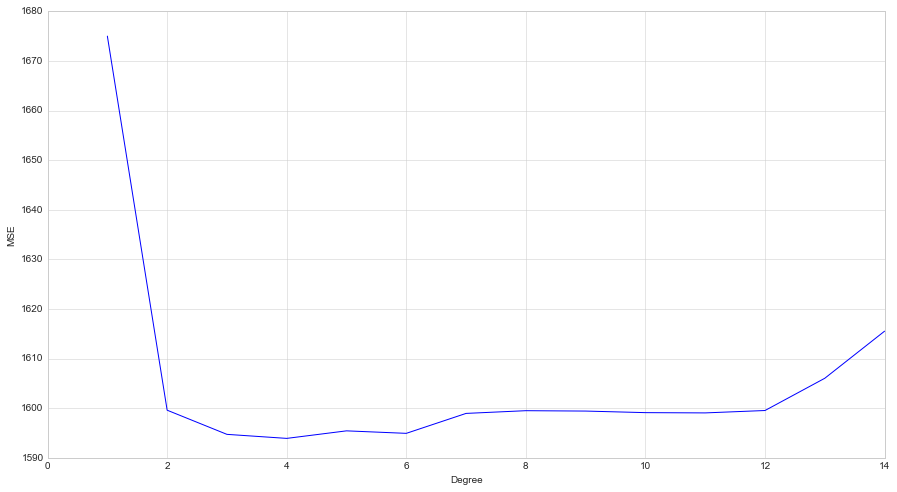

In [5]:
# plot results
fig,ax = plt.subplots(figsize=(15,8))
plt.plot(range(1,15),scores)
plt.xlabel('Degree')
plt.ylabel('MSE')

The optimal value for the polynomial degree is **4**.

In [6]:
# using ANOVA
models = []
for k in range(1,10):
    poly = PolynomialFeatures(degree=k)
    X_k = poly.fit_transform(X)
    model = smf.GLS(y,X_k).fit()
    models.append(model)
    
# compare models
sm.stats.anova_lm(models[0],models[1],models[2],models[3],models[4],models[5],models[6], typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.717559,2.226664e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.897326,1.671425e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.813115,5.094581e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.805674,3.694747e-01
5,2993.0,4.766389e+06,1.0,3932.257631,2.470144,1.161330e-01
6,2993.0,4.764599e+06,-0.0,1790.494628,-inf,NaN


The lower F-value is obtained for a polynomial of degree 4.

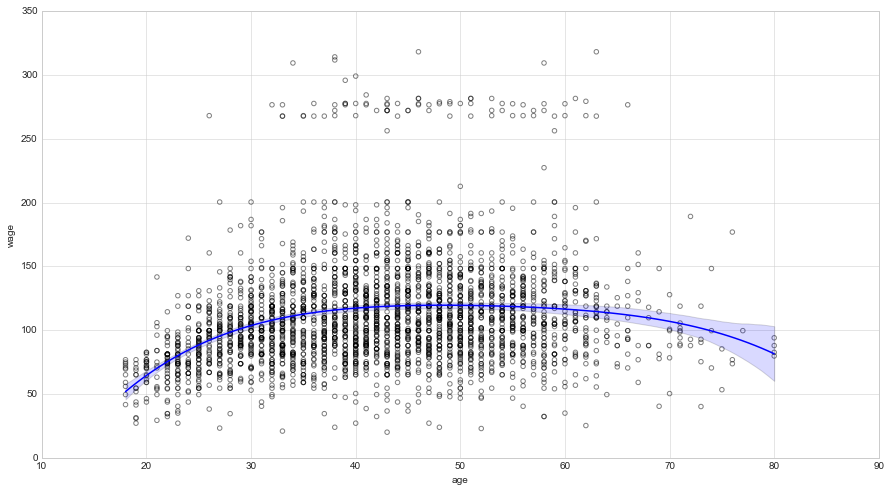

In [7]:
# Plot the results
fig, ax = plt.subplots(figsize=(15,8))

# plot existing data
ax.scatter(wage['age'],wage['wage'],alpha=0.5,facecolor='None',edgecolor='k')
# plot polynomial regression
sns.regplot(wage['age'],wage['wage'],order=4,scatter=False,ax=ax,truncate=True)
ax.set_ylim(ymin=0);

In [8]:
# 6b)
# step function
scores = []

for step in range(1,15):
    age_groups = pd.cut(wage['age'],step)
    df_dummies = pd.get_dummies(age_groups)
    
    X_step = df_dummies
    y_step = wage['age']
    
    model = LinearRegression()
    model.fit(X_step,y_step)
    score = cross_val_score(model, X_step, y_step,scoring='neg_mean_squared_error', cv=5)
    
    scores.append(-np.mean(score))

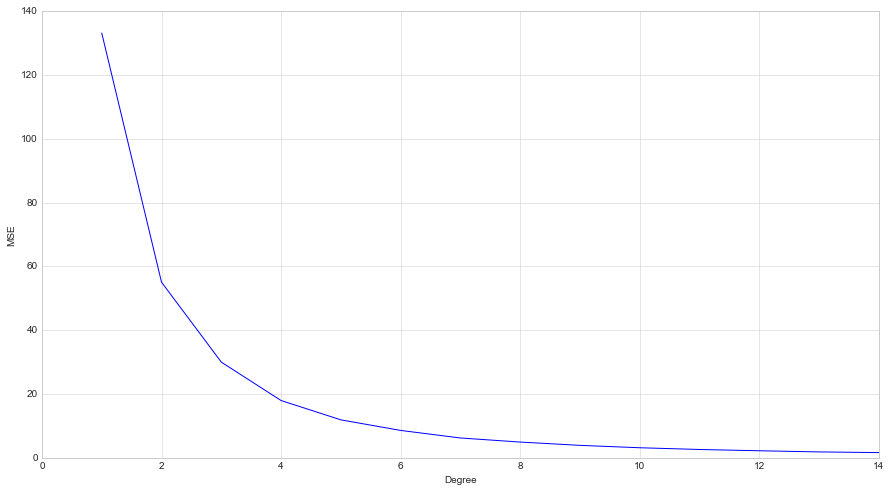

In [9]:
# plot results
fig,ax = plt.subplots(figsize=(15,8))
plt.plot(range(1,15),scores)
plt.xlabel('Degree')
plt.ylabel('MSE')

In [10]:
min_scores = []
for i in range(len(scores)):
    min_score = scores[i]
    min_scores.append(min_score)

    print('Number of cuts: %i, error %.3f' % (i+1, min_score))

Number of cuts: 1, error 133.216
Number of cuts: 2, error 55.073
Number of cuts: 3, error 30.008
Number of cuts: 4, error 17.960
Number of cuts: 5, error 11.901
Number of cuts: 6, error 8.586
Number of cuts: 7, error 6.213
Number of cuts: 8, error 4.935
Number of cuts: 9, error 3.902
Number of cuts: 10, error 3.152
Number of cuts: 11, error 2.608
Number of cuts: 12, error 2.205
Number of cuts: 13, error 1.848
Number of cuts: 14, error 1.633


It seems that there is not much gain after 8 cuts. We use this as the optimal value.

In [11]:
# prepare for plot
age_groups = pd.cut(wage['age'],8)
df_dummies = pd.get_dummies(age_groups)

X_step = df_dummies
y_step = wage['wage']

model = LinearRegression()
model.fit(X_step,y_step)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# make prediction
X_aux = np.linspace(18,80)
X_aux_dumm = pd.get_dummies(pd.cut(X_aux,8))
y_aux = model.predict(X_aux_dumm)

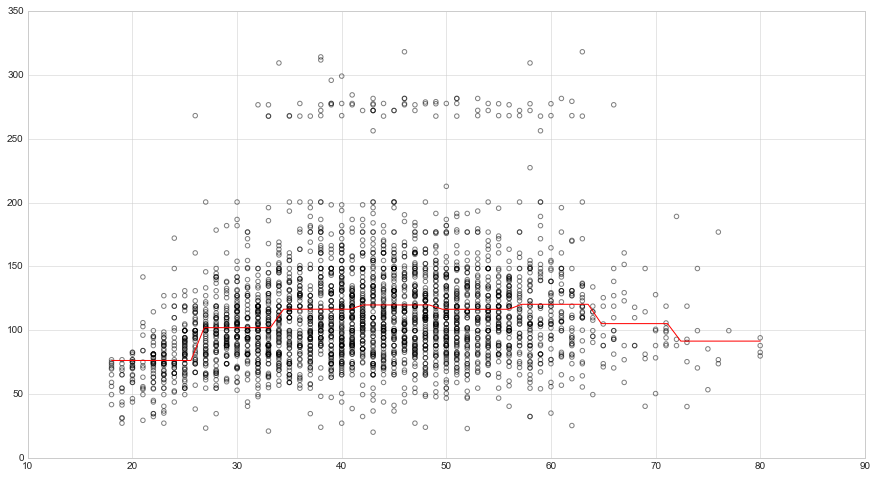

In [13]:
# Plot the results
fig, ax = plt.subplots(figsize=(15,8))

# plot existing data
ax.scatter(wage['age'],wage['wage'],alpha=0.5,facecolor='None',edgecolor='k')
# plot atep function
plt.plot(X_aux,y_aux,c='r')
ax.set_ylim(ymin=0);

## Question 8

In [14]:
auto = pd.read_csv('./datasets/Auto.csv',na_values='?')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [15]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


Investigate relationships

In [16]:
auto.dropna(inplace=True,axis=0)

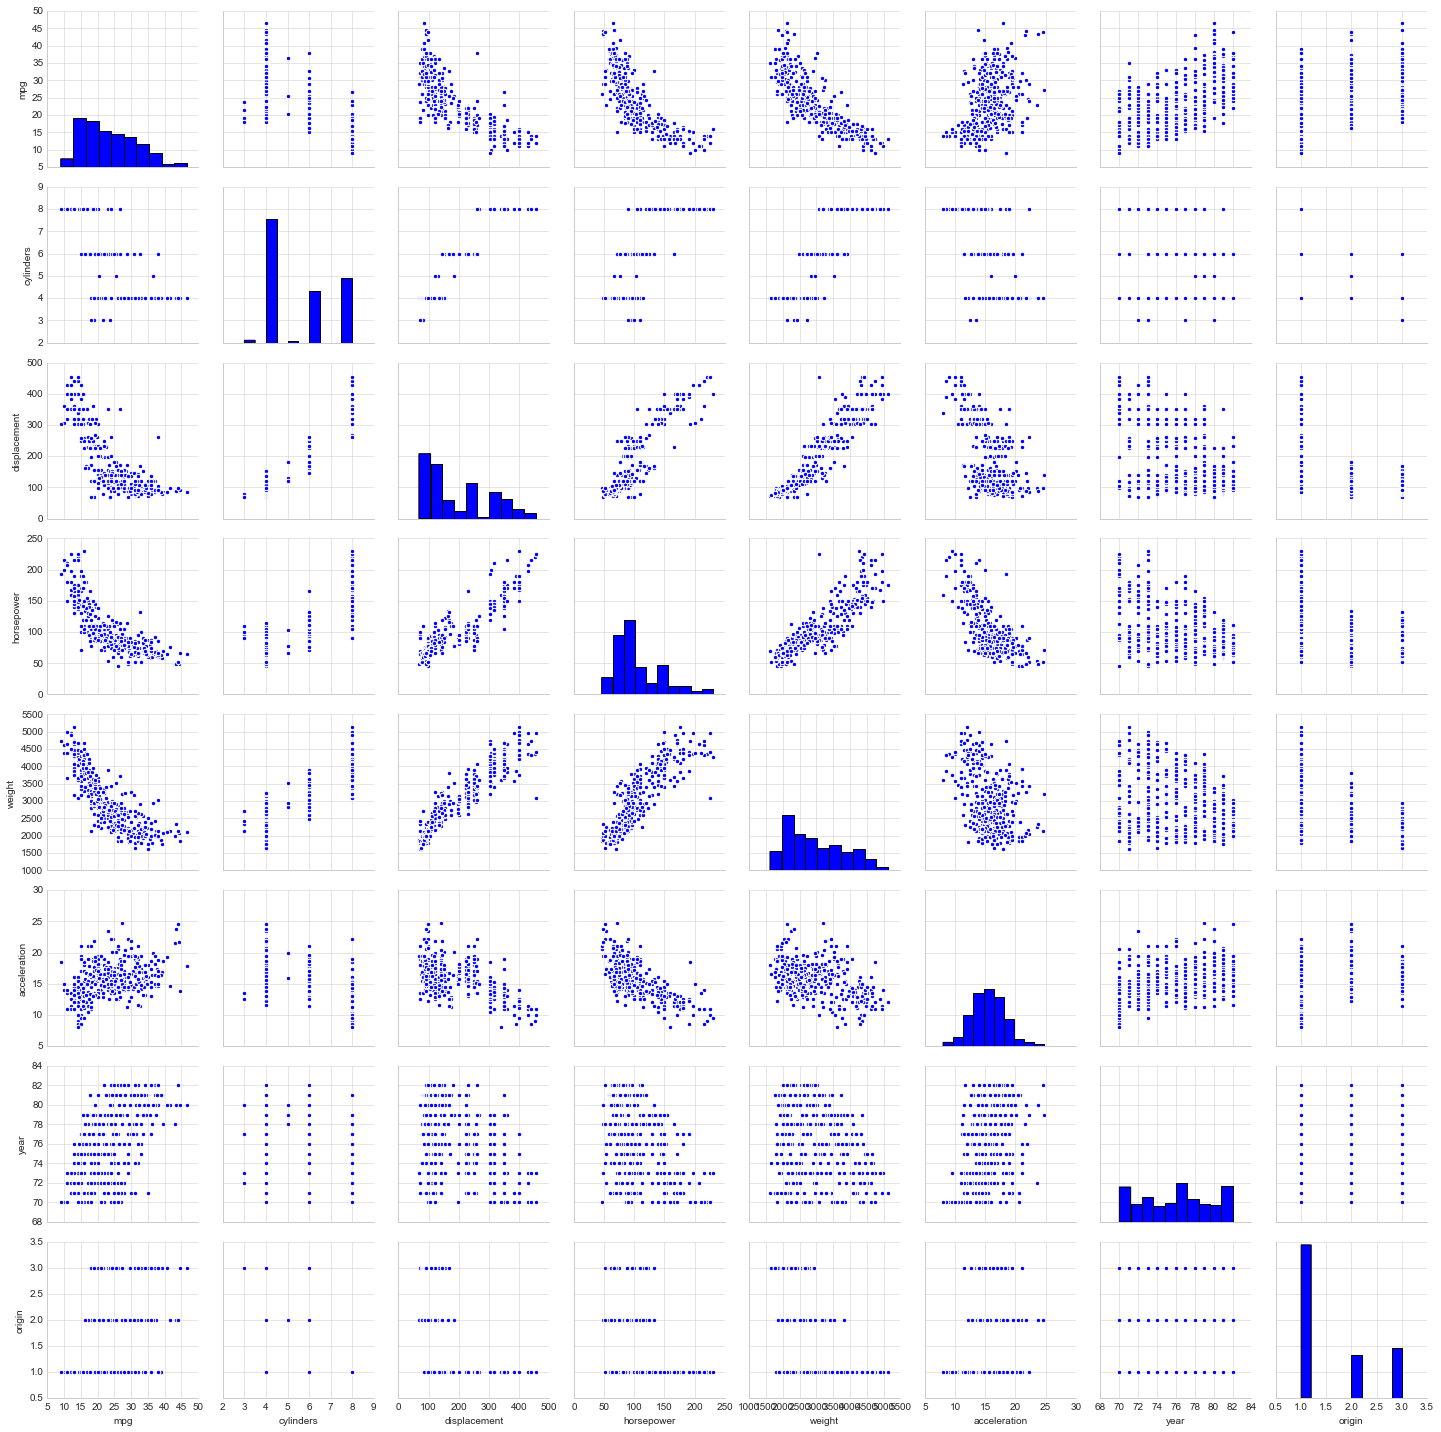

In [17]:
sns.pairplot(auto);

Relationships with mpg:
- non-linear with displacements, horspower, weight

In [18]:
# Model variables
y = auto['mpg'][:,np.newaxis]
X = auto['horsepower'][:,np.newaxis]

In [19]:
# polynomial regression, to predict wage using age.
scores = []
for deg in range(1,15):
    pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=deg)),
                ('lin_reg', LinearRegression())])
    pipe.fit(X,y)
    score = cross_val_score(pipe, X, y,scoring='neg_mean_squared_error', cv=5)
    scores.append(-np.mean(score))

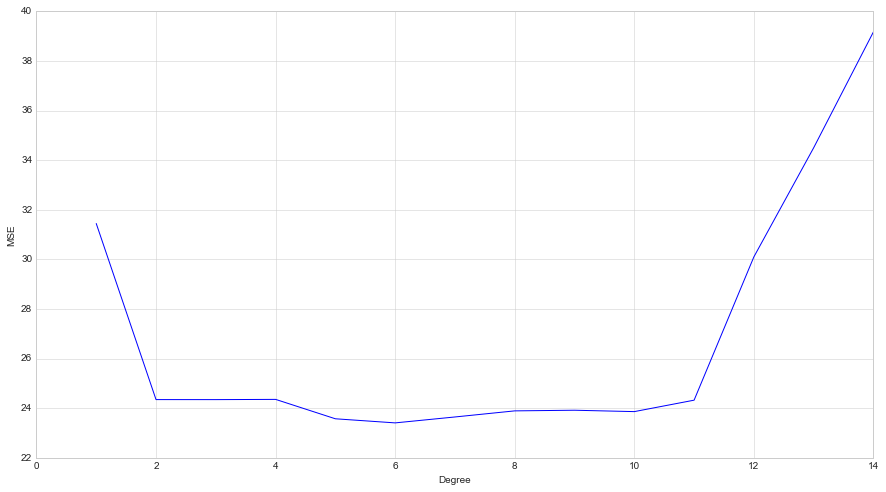

In [20]:
# plot results
fig,ax = plt.subplots(figsize=(15,8))
plt.plot(range(1,15),scores)
plt.xlabel('Degree')
plt.ylabel('MSE')

In [21]:
# using ANOVA
models = []
for k in range(1,10):
    poly = PolynomialFeatures(degree=k)
    X_k = poly.fit_transform(X)
    model = smf.GLS(y,X_k).fit()
    models.append(model)
    
# compare models
sm.stats.anova_lm(models[0],models[1],models[2],models[3],models[4],models[5],models[6], typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,389.0,7442.029412,1.0,1943.886460,103.618261,9.841297e-22
2,388.0,7426.436007,1.0,15.593405,0.831202,3.624914e-01
3,387.0,7399.522632,1.0,26.913375,1.434609,2.317468e-01
4,386.0,7223.371686,1.0,176.150946,9.389671,2.335362e-03
5,386.0,7246.195755,-0.0,-22.824069,inf,NaN
6,386.0,7241.389336,-0.0,4.806420,-inf,NaN


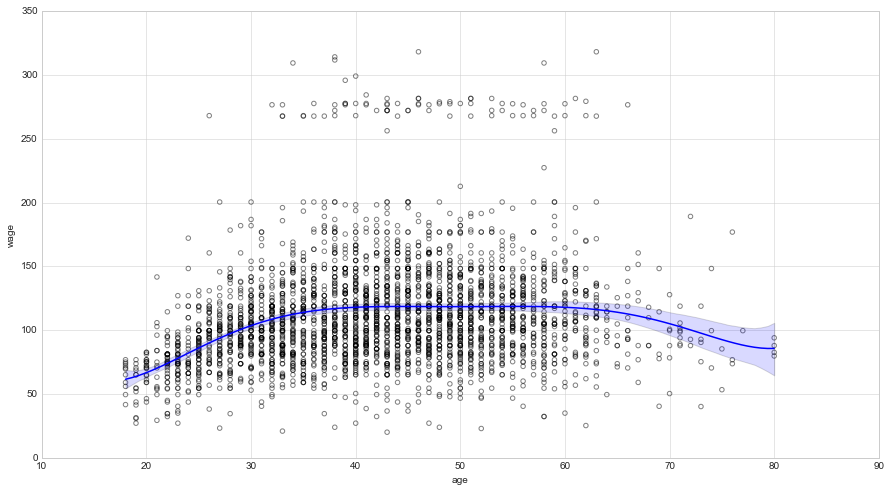

In [22]:
# Plot the results
fig, ax = plt.subplots(figsize=(15,8))

# plot existing data
ax.scatter(wage['age'],wage['wage'],alpha=0.5,facecolor='None',edgecolor='k')
# plot polynomial regression
sns.regplot(wage['age'],wage['wage'],order=6,scatter=False,ax=ax,truncate=True)
ax.set_ylim(ymin=0);

In [23]:
# step function
scores = []

for step in range(1,15):
    horsepower_groups = pd.cut(auto['horsepower'],step)
    df_dummies = pd.get_dummies(horsepower_groups)
    
    X_step = df_dummies
    y_step = auto['mpg']
    
    model = LinearRegression()
    model.fit(X_step,y_step)
    score = cross_val_score(model, X_step, y_step,scoring='neg_mean_squared_error', cv=5)
    
    scores.append(-np.mean(score))

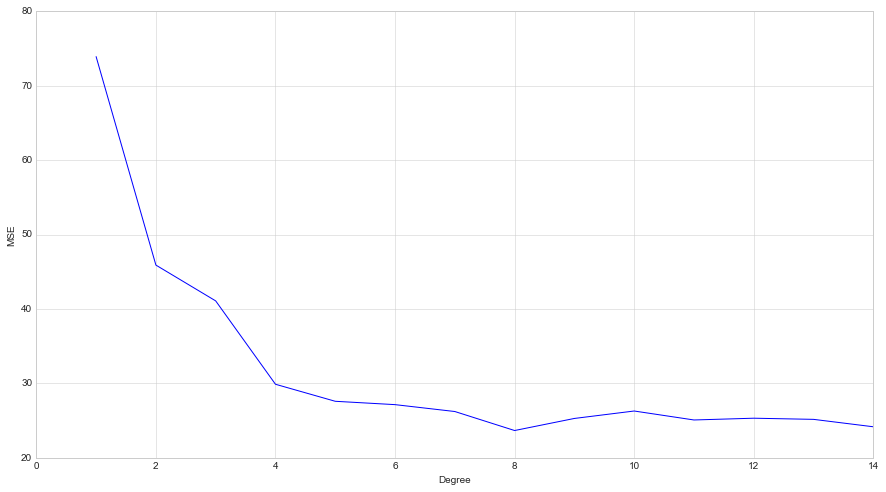

In [24]:
# plot results
fig,ax = plt.subplots(figsize=(15,8))
plt.plot(range(1,15),scores)
plt.xlabel('Degree')
plt.ylabel('MSE')

In [25]:
min_scores = []
for i in range(len(scores)):
    min_score = scores[i]
    min_scores.append(min_score)

    print('Number of cuts: %i, error %.3f' % (i+1, min_score))

Number of cuts: 1, error 73.925
Number of cuts: 2, error 45.902
Number of cuts: 3, error 41.090
Number of cuts: 4, error 29.885
Number of cuts: 5, error 27.596
Number of cuts: 6, error 27.146
Number of cuts: 7, error 26.221
Number of cuts: 8, error 23.666
Number of cuts: 9, error 25.289
Number of cuts: 10, error 26.289
Number of cuts: 11, error 25.084
Number of cuts: 12, error 25.322
Number of cuts: 13, error 25.167
Number of cuts: 14, error 24.171


In [26]:
# prepare for plot
horsepower_groups = pd.cut(auto['horsepower'],8)
df_dummies = pd.get_dummies(horsepower_groups)

X_step = df_dummies
y_step = auto['mpg']

model = LinearRegression()
model.fit(X_step,y_step)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# make prediction
X_aux = np.linspace(46,230)
X_aux_dumm = pd.get_dummies(pd.cut(X_aux,8))
y_aux = model.predict(X_aux_dumm)

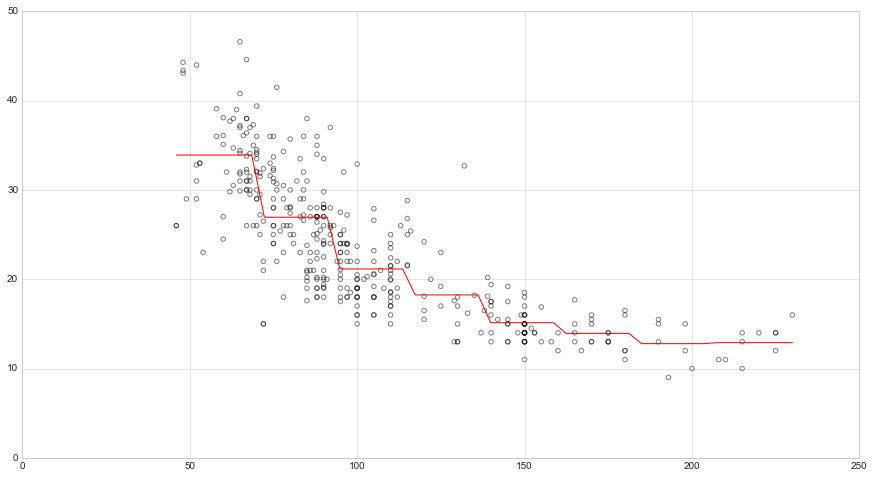

In [28]:
# Plot the results
fig, ax = plt.subplots(figsize=(15,8))

# plot existing data
ax.scatter(auto['horsepower'],auto['mpg'],alpha=0.5,facecolor='None',edgecolor='k')
# plot atep function
plt.plot(X_aux,y_aux,c='r')
ax.set_ylim(ymin=0);

In [29]:
# Cubic splines
for i in range(3,11):  # The degrees of freedom can't be less than 3 in a cubic spline
    transformed = dmatrix("bs(auto.horsepower, df=%i, degree=3)" % i,
                         {"auto.horsepower":auto.horsepower},
                          return_type='dataframe')  # Cubic spline basis representation
    lin = LinearRegression()
    lin.fit(transformed, y)

    score = cross_val_score(lin, transformed, y, cv=10, scoring='neg_mean_squared_error')

    print('Number of degrees of freedom: %i  CV mean squared error: %.3f' %(i, np.mean(np.abs(score))))

Number of degrees of freedom: 3  CV mean squared error: 21.337
Number of degrees of freedom: 4  CV mean squared error: 21.036
Number of degrees of freedom: 5  CV mean squared error: 20.643
Number of degrees of freedom: 6  CV mean squared error: 20.681
Number of degrees of freedom: 7  CV mean squared error: 20.889
Number of degrees of freedom: 8  CV mean squared error: 21.010
Number of degrees of freedom: 9  CV mean squared error: 20.860
Number of degrees of freedom: 10  CV mean squared error: 21.021


In [30]:
# Natural Cubic splines
for i in range(3,11):  # The degrees of freedom can't be less than 3 in a cubic spline
    transformed = dmatrix("cr(auto.horsepower, df=%i)" % i,
                         {"auto.horsepower":auto.horsepower},
                          return_type='dataframe')  # Cubic spline basis representation
    lin = LinearRegression()
    lin.fit(transformed, y)

    score = cross_val_score(lin, transformed, y, cv=10, scoring='neg_mean_squared_error')

    print('Number of degrees of freedom: %i  CV mean squared error: %.3f' %(i, np.mean(np.abs(score))))

Number of degrees of freedom: 3  CV mean squared error: 21.011
Number of degrees of freedom: 4  CV mean squared error: 21.224
Number of degrees of freedom: 5  CV mean squared error: 21.146
Number of degrees of freedom: 6  CV mean squared error: 20.769
Number of degrees of freedom: 7  CV mean squared error: 20.706
Number of degrees of freedom: 8  CV mean squared error: 20.703
Number of degrees of freedom: 9  CV mean squared error: 20.579
Number of degrees of freedom: 10  CV mean squared error: 20.703


## Question 9

In [32]:
# import data
boston = pd.read_csv('./datasets/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
# extract predictor and response
X = boston['dis'][:,np.newaxis]
y = boston['nox'][:,np.newaxis]

In [57]:
# a) Plynomial regression

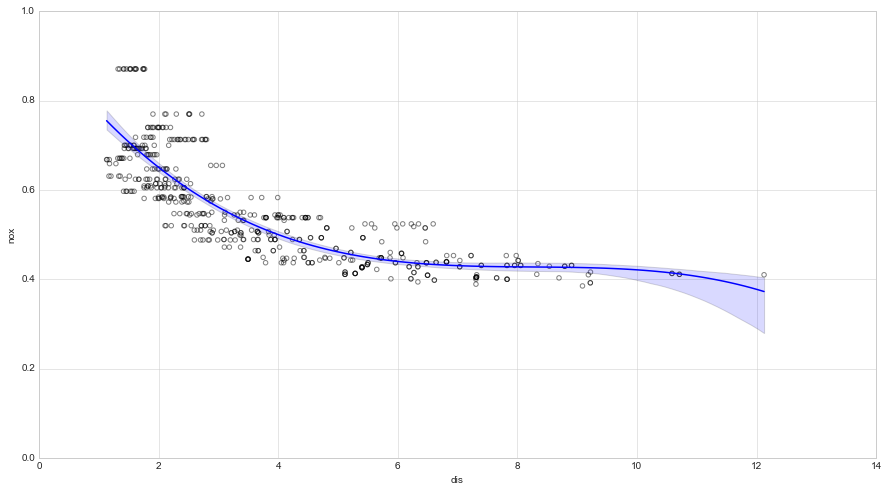

In [58]:
# Plot the results
fig, ax = plt.subplots(figsize=(15,8))

# plot existing data
ax.scatter(X,y,alpha=0.5,facecolor='None',edgecolor='k')
# plot polynomial regression
sns.regplot(boston['dis'], boston['nox'],order=3,scatter=False,ax=ax,truncate=True)
ax.set_ylim(ymin=0);

In [59]:
X3 = PolynomialFeatures(degree=3).fit_transform(X)
model = smf.GLS(y,X3).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.9341,0.021,45.110,0.000,0.893,0.975
x1,-0.1821,0.015,-12.389,0.000,-0.211,-0.153
x2,0.0219,0.003,7.476,0.000,0.016,0.028
x3,-0.0009,0.000,-5.124,0.000,-0.001,-0.001


In [63]:
# polynomial regression
scores = []
for deg in range(1,8):
    pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=deg)),
                ('lin_reg', LinearRegression())])
    pipe.fit(X,y)
    score = cross_val_score(pipe, X, y,scoring='neg_mean_squared_error', cv=5)
    scores.append(-np.mean(score))

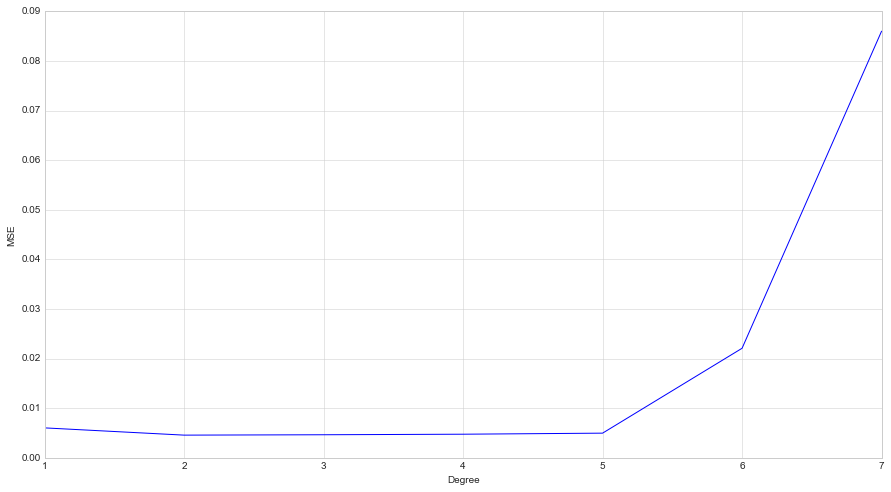

In [64]:
# plot results
fig,ax = plt.subplots(figsize=(15,8))
plt.plot(range(1,8),scores)
plt.xlabel('Degree')
plt.ylabel('MSE')